In [186]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [187]:
df = pd.read_csv('base_segundo_encontro.csv',sep=";", encoding='latin-1')
df

,tempo_conversa_min,risadas,pontos_comuns,nivel_timidez,mensagens_antes,iniciativa_conversa,local_encontro,momento_da_vida,segundo_encontro
0,112,16,6,0,45,8,Restaurante,Estressado,Sim
1,102,13,2,10,41,6,Bar,Estável,Sim
2,24,8,2,3,16,9,Café,Estável,Sim
3,116,7,4,0,8,4,Bar,Estressado,Sim
4,81,1,2,5,5,7,Parque,Estável,Não
...,...,...,...,...,...,...,...,...,...
995,129,19,6,0,25,8,Bar,Estável,Sim
996,68,17,5,6,12,3,Restaurante,Estável,Sim
997,137,5,3,7,7,7,Parque,Cansado,Sim
998,123,10,1,10,27,8,Bar,Estressado,Não


In [188]:
df.isnull().sum()

tempo_conversa_min     0
risadas                0
pontos_comuns          0
nivel_timidez          0
mensagens_antes        0
iniciativa_conversa    0
local_encontro         0
momento_da_vida        0
segundo_encontro       0
dtype: int64

<Axes: xlabel='nivel_timidez', ylabel='count'>

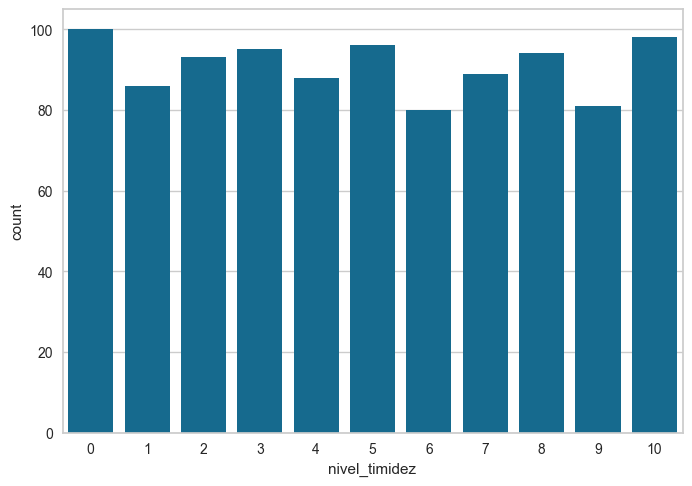

In [189]:
sns.countplot(x = df['nivel_timidez'])

<Axes: xlabel='nivel_timidez'>

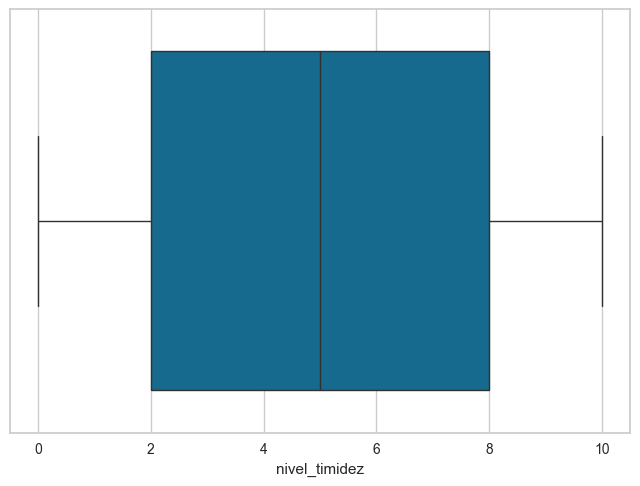

In [190]:
sns.boxplot(data = df, x = df['nivel_timidez'])

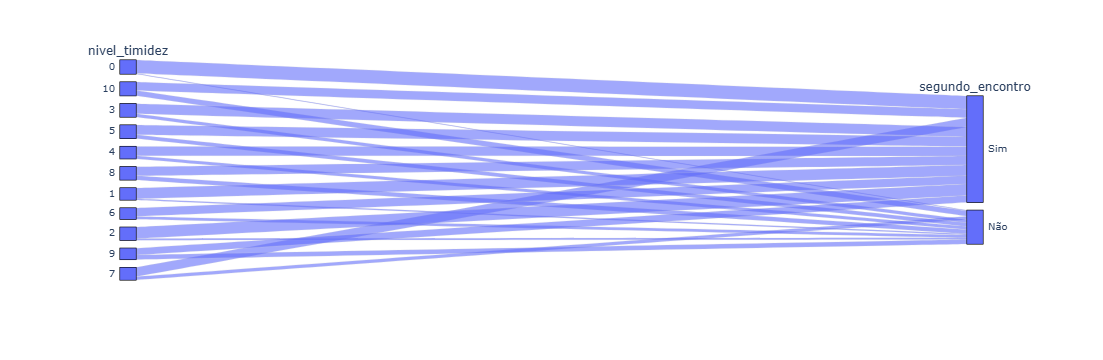

In [191]:
grafico = px.parallel_categories(df, dimensions=['nivel_timidez', 'segundo_encontro'])
grafico.show()

In [192]:
x = df.iloc[:,0:8]
y = df.iloc[:,8]

In [193]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

hot = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [6,7])], remainder='passthrough')

In [194]:
x = hot.fit_transform(x)
x

array([[ 0.,  0.,  0., ...,  0., 45.,  8.],
       [ 1.,  0.,  0., ..., 10., 41.,  6.],
       [ 0.,  1.,  0., ...,  3., 16.,  9.],
       ...,
       [ 0.,  0.,  1., ...,  7.,  7.,  7.],
       [ 1.,  0.,  0., ..., 10., 27.,  8.],
       [ 0.,  1.,  0., ...,  7., 29.,  8.]])

In [195]:
from sklearn.preprocessing import StandardScaler 

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [196]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state = 0)

In [197]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

kernels = ['linear','poly','rbf','sigmoid']
Cs=[0.1,1,2,10]
melhorAccuracy = 0

for k in kernels:
    for c in Cs:
        svm = SVC(kernel=k, C = c)
        svm.fit(x_train, y_train )
        previsoes = svm.predict(x_test)
        accuracy = accuracy_score(y_test, previsoes)
        
        if accuracy > melhorAccuracy:
            melhorAccuracy = accuracy
            melhorKernel = k
            melhorC = c

svm = SVC(kernel=melhorKernel, C = melhorC)
svm.fit(x_train, y_train )

'linear'

In [198]:
previsoes = svm.predict(x_test)
previsoes

array(['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim', 'Sim', 'Não', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Não', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Sim',
       'Sim', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não', 'Não', 'Não', 'Sim',
       'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim', 'Não',
       'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim', 'Sim', 'Sim',
       'Não', 'Sim',

In [199]:
y_test

993    Sim
859    Não
298    Sim
553    Não
672    Sim
      ... 
462    Sim
356    Sim
2      Sim
478    Sim
695    Sim
Name: segundo_encontro, Length: 250, dtype: object

0.996

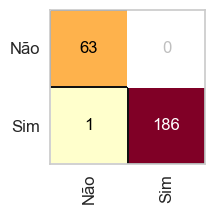

In [200]:
from yellowbrick.classifier import ConfusionMatrix 
plt.figure(figsize=(2,2))
cm = ConfusionMatrix(svm)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

In [209]:
tempo = input('Qual o tempo que durou a conversa? ')
risada = input('Quantas risadas vc deu? ')
comum = input('Quantos pontos em comum vcs tem? ')
timidez = input('qual o nivel de timidez? ')
mensagem = input('Quantas mensagens vcs trocaram antes do encontro? ')
iniciativa = input('Qual foi o nivel de iniciativa da conversa? ')
local = input('Qual foi o local do encontro? ')
vida = input('Qual o momento da vida que vc se encontra? ')

myDf = pd.DataFrame([[tempo, risada,comum,timidez,mensagem,iniciativa,local,vida]], 
             columns=['tempo_conversa_min', 'risadas', 'pontos_comuns',	'nivel_timidez',	'mensagens_antes', 'iniciativa_conversa', 'local_encontro', 'momento_da_vida'])

myDf = hot.transform(myDf)
myDf = pd.DataFrame(myDf, columns = hot.get_feature_names_out())
myDf

previsoes = svm.predict(myDf)
print('\n==========================================================\n')
if previsoes == "Sim":
    print('Parabéns você terá um segundo encontro!!')
else:
    print('Você deu macada meu chapa, não vai rolar de novo não')

print('\n==========================================================')

Qual o tempo que durou a conversa?  120
Quantas risadas vc deu?  30
Quantos pontos em comum vcs tem?  10
qual o nivel de timidez?  1
Quantas mensagens vcs trocaram antes do encontro?  200
Qual foi o nivel de iniciativa da conversa?  10
Qual foi o local do encontro?  Restaurante
Qual o momento da vida que vc se encontra?  Estável




Parabéns você terá um segundo encontro!!



C:\Users\iar1ct\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2742: UserWarning:

X has feature names, but SVC was fitted without feature names

